### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
print(data.isnull().sum().sort_values())
print(data.dtypes)

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64
destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration           

3. Decide what to do about your missing data -- drop, replace, other... <br>
<span style="color: red;">
Investigation: <br>
1, most of the data in column 'car' is null, no need to further analysis in this case, this column can be dropped<br>
2, for other columns contain null values, we can drop them when further analysis the data, no actions are required for now<br>
3, I noticed that column Y actually presents if customer reponses Yes to the enquiry, so I would like to change this column to a more meaningful name, and meaningful values<br>
4, temperature column's type is int64, but it is a catagory of 30F, 55F, or 80F, so change it to string</br>
</span>    


In [6]:
df_clean = data.drop('car', axis=1)
df_clean = df_clean.rename(columns={"Y": "Respond"})
df_clean['Respond'] = df_clean['Respond'].astype(str)
df_clean['Respond'] = df_clean['Respond'].str.replace("0", "No").str.replace("1", "Yes")
df_clean['temperature'] = df_clean['temperature'].astype(str)
print(df_clean.dtypes)

destination             object
passanger               object
weather                 object
temperature             object
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Respond                 object
dtype: object


4. What proportion of the total observations chose to accept the coupon? 



  Respond  counts
0      No    5474
1     Yes    7210


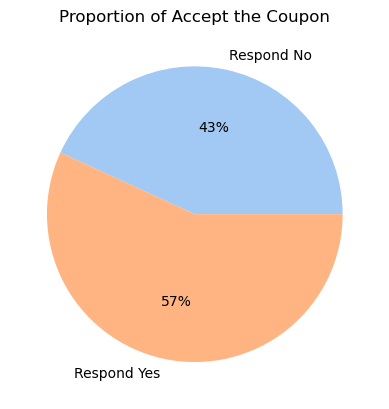

In [29]:
#group by coupon and respond
grouped_counts = df_clean.groupby(['Respond']).size().reset_index(name='counts')
print(grouped_counts)

labels = ['Respond No', 'Respond Yes']
colors = sns.color_palette('pastel')[0:len(data)]
plt.pie(grouped_counts['counts'], labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Proportion of Accept the Coupon')
plt.show()

#fig = px.pie(grouped_counts, values='counts', names='Respond', title='Proportion of Accept the Coupon')
#fig.update_traces(textposition='inside', textinfo='percent+value')
#fig.show()

5. Use a bar plot to visualize the `coupon` column.

In [8]:
grouped_counts_coupon = df_clean.groupby(['coupon','Respond']).size().reset_index(name='counts')
print(grouped_counts_coupon)

fig = px.bar(grouped_counts_coupon, x='coupon',y=['counts'], color='Respond',title='Coupon Type Counts')
fig.show()

                  coupon Respond  counts
0                    Bar      No    1190
1                    Bar     Yes     827
2  Carry out & Take away      No     633
3  Carry out & Take away     Yes    1760
4           Coffee House      No    2001
5           Coffee House     Yes    1995
6      Restaurant(20-50)      No     834
7      Restaurant(20-50)     Yes     658
8        Restaurant(<20)      No     816
9        Restaurant(<20)     Yes    1970


6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Response count for Temperature')

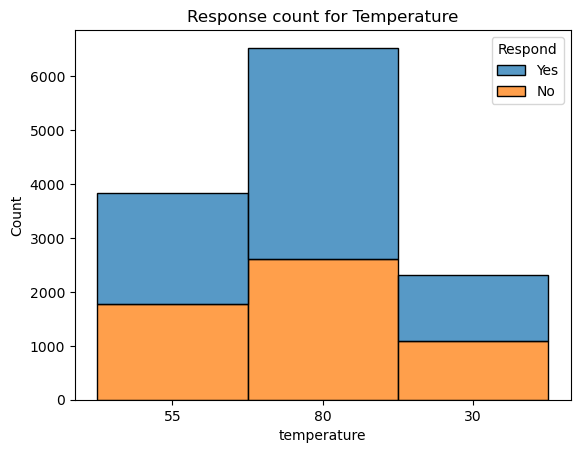

In [27]:
sns.histplot(data=df_clean, x='temperature', hue='Respond', multiple='stack').set_title('Response count for Temperature')


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
df_bar = df_clean[df_clean['coupon'] == "Bar"]
df_bar = df_bar.dropna(subset=['Bar', 'RestaurantLessThan20'])

2. What proportion of bar coupons were accepted?


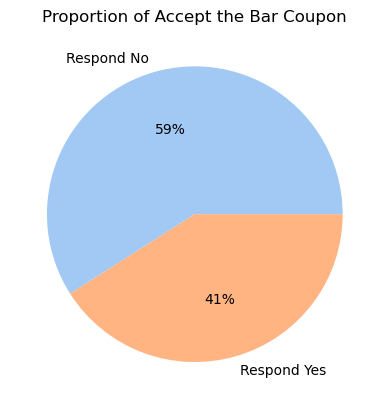

In [30]:
grouped_bar_counts = df_bar.groupby(['Respond']).size().reset_index(name='counts')

labels = ['Respond No', 'Respond Yes']
colors = sns.color_palette('pastel')[0:len(data)]
plt.pie(grouped_bar_counts['counts'], labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Proportion of Accept the Bar Coupon')
plt.show()

#fig = px.pie(grouped_bar_counts, values='counts', names='Respond', title='Proportion of Accept the Bar Coupon')
#fig.update_traces(textposition='inside', textinfo='percent+value')
#fig.show()


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [12]:
list_value_gt3 = ['gt8','4~8']
df_bar['bar_gt3'] = df_bar.Bar.isin(list_value_gt3)
ct = pd.crosstab(df_bar['bar_gt3'], df_bar['Respond'], normalize=True, margins=True)
print(ct)

Respond        No       Yes       All
bar_gt3                              
False    0.567104  0.332492  0.899596
True     0.023209  0.077195  0.100404
All      0.590313  0.409687  1.000000


<span style="color: red;">
Analysis:<BR>
41% of the bar coupon is responded yes, among it, <BR>
8% is the driver who went to a bar more than 4 times a month<BR>
33% is the driver who went to a bar 3 or fewer times a month<BR>

compare to 59% of the bar coupon is responded no, among it,<BR>
2% is the driver who went to a bar more than 4 times a month<BR>
57% is the driver who went to a bar 3 or fewer times a month<BR>

driver who went to a bar more than 4 times a month is more likely to repond yes to bar coupon.<BR><BR>

</span>

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [13]:
list_value_age_25 = ['46','26','31','41','50plus','36']
list_value_bar = ['1~3','gt8','4~8']
df_bar['condition_1'] = (df_bar.age.isin(list_value_age_25)) & (df_bar.Bar.isin(list_value_bar))

ct = pd.crosstab(df_bar['condition_1'], df_bar['Respond'], normalize=True,margins=True)
print(ct)


Respond            No       Yes       All
condition_1                              
False        0.525732  0.262361  0.788093
True         0.064581  0.147326  0.211907
All          0.590313  0.409687  1.000000


<span style="color: red;">
Analysis:<BR>
41% of the bar coupon is responded yes, among it, <BR>
15% is the driver who met this condition, it is greater than 7% of 3), that means we hit more reponded yes drive with this condition<BR>
26% is the driver who doesn't met this condition<BR>

compare to 59% of the bar coupon is responded no, among it,<BR>
6% is the driver who met this condition<BR>
53% is the driver who doesn't met this condition<BR><BR>


</span>


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [14]:
df_bar['condition_2'] = (df_bar.Bar.isin(list_value_bar)) & (df_bar.passanger != 'Kid(s)') & (df_bar.occupation != 'Farming Fishing & Forestry')
ct = pd.crosstab(df_bar['condition_2'], df_bar['Respond'], normalize=True,margins=True)
print(ct)

Respond            No       Yes       All
condition_2                              
False        0.510595  0.211403  0.721998
True         0.079717  0.198285  0.278002
All          0.590313  0.409687  1.000000


<span style="color: red;">
Analysis:<BR>
41% of the bar coupon is responded yes, among it, <BR>
20% is the driver who met this condition, it is greater than 15% of 4) <BR>
21% is the driver who doesn't met this condition<BR>

compare to 59% of the bar coupon is responded no, among it,<BR>
8% is the driver who met this condition<BR>
51% is the driver who doesn't met this condition<BR><BR>
    
</span>    

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [15]:
list_value_50k = ['$37500 - $49999','$12500 - $24999','$25000 - $37499','Less than $12500']
list_value_age_30 = ['21','below21','26','31']
df_bar['condition_3'] = ((df_bar.Bar.isin(list_value_bar)) & (df_bar.passanger != 'Kid(s)') & (df_bar.maritalStatus != 'Widowed')) | (
    (df_bar.Bar.isin(list_value_bar))  & (df_bar.age.isin(list_value_age_30))) | (
        (df_bar.RestaurantLessThan20.isin(list_value_gt3)) & (df_bar.income.isin(list_value_50k))
    )
ct = pd.crosstab(df_bar['condition_3'], df_bar['Respond'],normalize=True,margins=True)
print(ct)

Respond            No       Yes       All
condition_3                              
False        0.427851  0.179112  0.606963
True         0.162462  0.230575  0.393037
All          0.590313  0.409687  1.000000


<span style="color: red;">
Analysis:<BR>
41% of the bar coupon is responded yes, among it, <BR>
23% is the driver who met this condition, it is greater than 20% of 4) <BR>
18% is the driver who doesn't met this condition<BR>

compare to 59% of the bar coupon is responded no, among it,<BR>
16% is the driver who met this condition<BR>
43% is the driver who doesn't met this condition<BR><BR>

driver who met this condition is more likely to repond yes to the coupon. 
    
<span>    

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

<span style="color: red;">
Since from 6), driver who met this condition is more likely to repond yes (23%), we should send coupon to drivers who met this condition 
</span>    

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Investigating the Carry out & Take away Coupons**  

1. Create a new `DataFrame` that contains just the carry out & take away coupons.

In [41]:
df_takeaway = df_clean[df_clean['coupon'] == "Carry out & Take away"]
df_takeaway = df_takeaway.dropna(subset=['Bar', 'RestaurantLessThan20', 'CarryAway', 'Restaurant20To50'])

2. What proportion of carry out & take away coupons were accepted?


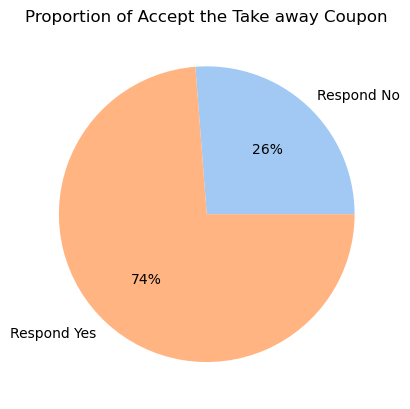

In [42]:
grouped_takeaway_counts = df_takeaway.groupby(['Respond']).size().reset_index(name='counts')

labels = ['Respond No', 'Respond Yes']
colors = sns.color_palette('pastel')[0:len(data)]
plt.pie(grouped_takeaway_counts['counts'], labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Proportion of Accept the Take away Coupon')
plt.show()

#fig = px.pie(grouped_takeaway_counts, values='counts', names='Respond', title='Proportion of Accept the Take away Coupon')
#fig.update_traces(textposition='inside', textinfo='percent+value')
#fig.show()

3. Investigate column CarryAway, What is the acceptance counts of each catagory? 

In [49]:
grouped_counts_coupon = df_takeaway.groupby(['CarryAway','Respond']).size().reset_index(name='counts')
print(grouped_counts_coupon)

fig = px.bar(grouped_counts_coupon, x='CarryAway',y=['counts'], color='Respond')
fig.show()

  CarryAway Respond  counts
0       1~3      No     222
1       1~3     Yes     630
2       4~8      No     193
3       4~8     Yes     590
4       gt8      No      73
5       gt8     Yes     223
6     less1      No     111
7     less1     Yes     237
8     never      No       6
9     never     Yes      22


<span style="color: red;">
Observation: <br>

pick 1-3, gt8, 4-8 will hit most of the drivers who accept the coupon.  <br>  
so add first condition: <br>    
    
</span>  

4. Compare the acceptance rate between those who went to takeaway 3 or fewer times a month to those who went more. Extend it to the drivers who went to takeway at least 1 time a month. 

In [23]:
list_value_gt1 = ['1~3','gt8','4~8']
list_value_gt3 = ['gt8','4~8']
df_takeaway['go_gt1'] = df_takeaway.CarryAway.isin(list_value_gt1)
ct = pd.crosstab(df_takeaway['go_gt1'], df_takeaway['Respond'], normalize=True, margins=True)
print(ct)

df_takeaway['go_gt3'] = df_takeaway.CarryAway.isin(list_value_gt3)
ct = pd.crosstab(df_takeaway['go_gt3'], df_takeaway['Respond'], normalize=True, margins=True)
print(ct)

Respond        No       Yes       All
go_gt1                               
False    0.050715  0.112267  0.162982
True     0.211530  0.625488  0.837018
All      0.262245  0.737755  1.000000
Respond        No       Yes       All
go_gt3                               
False    0.146944  0.385349  0.532293
True     0.115301  0.352406  0.467707
All      0.262245  0.737755  1.000000


<span style="color: red;">
Analysis: <br>
By comapring the results above, we can see that Pick 1-3, gt8, 4-8 will increase the True-Yes rate. <br>    
    
</span> 
<br>

5. Investigate column passanger, What is the acceptance counts of each catagory? How it is related to CarryAway?

In [69]:
grouped_counts_coupon = df_takeaway.groupby(['passanger','Respond']).size().reset_index(name='counts')
print(grouped_counts_coupon)

fig = px.bar(grouped_counts_coupon, x='passanger',y=['counts'], color='Respond')
fig.show()

   passanger Respond  counts
0      Alone      No     363
1      Alone     Yes     991
2  Friend(s)      No     173
3  Friend(s)     Yes     542
4     Kid(s)      No      43
5     Kid(s)     Yes     100
6    Partner      No      26
7    Partner     Yes      69


In [75]:
grouped_counts_coupon = df_takeaway.groupby(['passanger','CarryAway','Respond']).size().reset_index(name='counts')
print(grouped_counts_coupon)

    passanger CarryAway Respond  counts
0       Alone       1~3      No     135
1       Alone       1~3     Yes     349
2       Alone       4~8      No     118
3       Alone       4~8     Yes     358
4       Alone       gt8      No      42
5       Alone       gt8     Yes     128
6       Alone     less1      No      67
7       Alone     less1     Yes     142
8       Alone     never      No       1
9       Alone     never     Yes      14
10  Friend(s)       1~3      No      65
11  Friend(s)       1~3     Yes     217
12  Friend(s)       4~8      No      50
13  Friend(s)       4~8     Yes     173
14  Friend(s)       gt8      No      27
15  Friend(s)       gt8     Yes      78
16  Friend(s)     less1      No      28
17  Friend(s)     less1     Yes      69
18  Friend(s)     never      No       3
19  Friend(s)     never     Yes       5
20     Kid(s)       1~3      No      14
21     Kid(s)       1~3     Yes      38
22     Kid(s)       4~8      No      18
23     Kid(s)       4~8     Yes      37


<span style="color: red;">
Analysis: <br>
By comapring the results above, we can see that Pick Alone, Friend(s) will increase the True-Yes rate. <br>    
    
</span> 
<br>

6. Compare the acceptance rate between those who went to takeaway at least 1 time a month or went alone or had passengers as friends to those who doesn't met the condition.

In [55]:
list_value_passenger = ['Alone','Friends(s)']
df_takeaway['condition_1'] = df_takeaway.passanger.isin(list_value_passenger)
ct = pd.crosstab(df_takeaway['condition_1'], df_takeaway['Respond'], normalize=True, margins=True)
print(ct)

Respond            No       Yes       All
condition_1                              
False        0.104898  0.308192  0.413091
True         0.157347  0.429562  0.586909
All          0.262245  0.737755  1.000000


<span style="color: red;">
adding this condition to 5) <br>    
    
</span> 
<br>

In [76]:
df_takeaway['condition_1'] = df_takeaway.CarryAway.isin(list_value_gt1) | df_takeaway.passanger.isin(list_value_passenger)
ct = pd.crosstab(df_takeaway['condition_1'], df_takeaway['Respond'], normalize=True, margins=True)
print(ct)


Respond            No       Yes       All
condition_1                              
False        0.021240  0.044647  0.065886
True         0.241006  0.693108  0.934114
All          0.262245  0.737755  1.000000


<span style="color: red;">
Note:
By adding an or operator, will increase the true-yes hit, but the overall true hit will be 93, that means we need to distribute the coupon alost to everyone, it is not very efficient<br>    
    
</span> 
<br>

7. Investigate column maritalStatus, What is the acceptance counts of each catagory? 

In [59]:
grouped_counts_coupon = df_takeaway.groupby(['maritalStatus','Respond']).size().reset_index(name='counts')
print(grouped_counts_coupon)

fig = px.bar(grouped_counts_coupon, x='maritalStatus',y=['counts'], color='Respond')
fig.show()





       maritalStatus Respond  counts
0           Divorced      No      30
1           Divorced     Yes      78
2    Married partner      No     243
3    Married partner     Yes     665
4             Single      No     220
5             Single     Yes     679
6  Unmarried partner      No     109
7  Unmarried partner     Yes     263
8            Widowed      No       3
9            Widowed     Yes      17


In [91]:
list_value_maritalstatus = ['Widowed','Single','Divorced']
df_takeaway['condition_2'] = df_takeaway.CarryAway.isin(list_value_gt3) | df_takeaway.maritalStatus.isin(list_value_maritalstatus)
ct = pd.crosstab(df_takeaway['condition_2'], df_takeaway['Respond'], normalize=True, margins=True)
print(ct)

Respond            No       Yes       All
condition_2                              
False        0.085826  0.213697  0.299523
True         0.176420  0.524057  0.700477
All          0.262245  0.737755  1.000000


<span style="color: red;">
Note:
After multiply and combine conditions, I found it is more efficient to combine 'have takeaway more than 3 times a month' or 'with marital status widowed, single or divorced'. In such case, the coupon will only need to be distributed to 70% of the person, but 52% out of 70% --> 74% will hit yes respond. <br>    
    
</span> 
<br>

8. Investigate column occupation, What is the acceptance counts of each catagory? 

In [92]:
grouped_counts_coupon = df_takeaway.groupby(['occupation','Respond']).size().reset_index(name='counts')
print(grouped_counts_coupon)

fig = px.bar(grouped_counts_coupon, x='occupation',y=['counts'], color='Respond')
fig.show()




                                   occupation Respond  counts
0                  Architecture & Engineering      No      11
1                  Architecture & Engineering     Yes      19
2    Arts Design Entertainment Sports & Media      No      31
3    Arts Design Entertainment Sports & Media     Yes      70
4   Building & Grounds Cleaning & Maintenance     Yes       9
5                        Business & Financial      No      19
6                        Business & Financial     Yes      80
7                 Community & Social Services      No      13
8                 Community & Social Services     Yes      34
9                     Computer & Mathematical      No      73
10                    Computer & Mathematical     Yes     185
11                  Construction & Extraction      No       1
12                  Construction & Extraction     Yes      27
13                 Education&Training&Library      No      50
14                 Education&Training&Library     Yes     122
15      

<span style="color: red;">
Observation:
Drivers from some of the occupations are all responded to Yes, so add those occupations
<br>    
    
</span> 
<br>

In [109]:
list_value_occupation = ['Building & Grounds Cleaning & Maintenance','Protective Service','Farming Fishing & Forestry','Construction & Extraction']
df_takeaway['condition_3'] = df_takeaway.CarryAway.isin(list_value_gt3) | df_takeaway.maritalStatus.isin(list_value_maritalstatus) | df_takeaway.occupation.isin(list_value_occupation)
ct = pd.crosstab(df_takeaway['condition_3'], df_takeaway['Respond'], normalize=True, margins=True)

print(ct)

Respond            No       Yes       All
condition_3                              
False        0.084959  0.204595  0.289554
True         0.177287  0.533160  0.710446
All          0.262245  0.737755  1.000000


### Conclusion <br>

<span style="color: red;">
   
The following driver groups are most likely to accept carry out & take away coupons <br>

1, Drivers who had take away more than 3 times a month <br>
or <br>
2, Drivers who is Widowed, Single, or Divorced <br>
or <br>
3, Drivers whose occupation is among Building & Grounds Cleaning & Maintenance, Protective Service, Farming Fishing & Forestry, Construction & Extraction <br>

<br>
</span>


## Course Assignment Solution Files

### /driving_coupon_analysis - Will a Customer Accept the Coupon?
[solution file](driving_coupon_analysis/solution.ipynb)

**Conclusion**<br>
**1. Investigating the Bar Coupons** <br>
<span style="color: red;">
The following driver groups are most likely to accept bar coupons <br>
1, go to bars more than once a month, had passengers that were not a kid, and were not widowed <br>
OR <br>
2, go to bars more than once a month and are under the age of 30 <br>
OR <br>
3, go to cheap restaurants more than 4 times a month and income is less than 50K <br>
<br>
</span>
**2. Investigating the Carry out & Take away Coupons** <br>
<span style="color: red;">
The following driver groups are most likely to accept carry out & take away coupons <br>
1, Drivers who had take away more than 3 times a month <br>
or <br>
2, Drivers who is Widowed, Single, or Divorced <br>
or <br>
3, Drivers whose occupation is among Building & Grounds Cleaning & Maintenance, Protective Service, Farming Fishing & Forestry, Construction & Extraction <br>

<br>
</span>